# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('911.csv')

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [13]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [16]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [19]:
df['title'].nunique(5)

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [5]:
df['Reason'] = df['title'].apply(lambda x: x.split(":")[0])

In [27]:
# df.head()
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


** What is the most common Reason for a 911 call based off of this new column? **

In [30]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Reason', ylabel='count'>

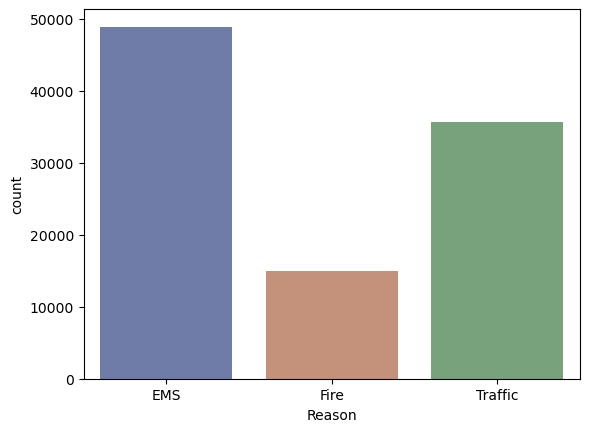

In [53]:
sns.countplot(data = df ,x = "Reason", hue = "Reason", palette = "dark", alpha = 0.6)

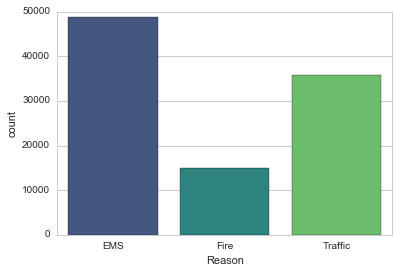

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [79]:
df.timeStamp
type(df['timeStamp'][1])

str

In [81]:
df['timeStamp'].dtype

dtype('O')

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [87]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [12]:
df['timeStamp1'] = pd.to_datetime(df['timeStamp'] , format=  "%Y-%m-%d %H:%M:%S")

In [101]:
df['timeStamp1'].iloc[0].hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [14]:
df['Hours']  = df['timeStamp1'].apply(lambda x: x.hour)
df[['Hours', 'timeStamp1']]

,Hours,timeStamp1
0,17,2015-12-10 17:40:00
1,17,2015-12-10 17:40:00
2,17,2015-12-10 17:40:00
3,17,2015-12-10 17:40:01
4,17,2015-12-10 17:40:01
...,...,...
99487,11,2016-08-24 11:06:00
99488,11,2016-08-24 11:07:02
99489,11,2016-08-24 11:12:00
99490,11,2016-08-24 11:17:01


In [16]:
df['Month']  = df['timeStamp1'].apply(lambda x: x.month)
df[['Hours','Month' ,'timeStamp1']]

,Hours,Month,timeStamp1
0,17,12,2015-12-10 17:40:00
1,17,12,2015-12-10 17:40:00
2,17,12,2015-12-10 17:40:00
3,17,12,2015-12-10 17:40:01
4,17,12,2015-12-10 17:40:01
...,...,...,...
99487,11,8,2016-08-24 11:06:00
99488,11,8,2016-08-24 11:07:02
99489,11,8,2016-08-24 11:12:00
99490,11,8,2016-08-24 11:17:01


In [18]:
df['DayofWeek']  = df['timeStamp1'].apply(lambda x: x.dayofweek)
df[['Hours','Month','DayofWeek' ,'timeStamp1']]

,Hours,Month,DayofWeek,timeStamp1
0,17,12,3,2015-12-10 17:40:00
1,17,12,3,2015-12-10 17:40:00
2,17,12,3,2015-12-10 17:40:00
3,17,12,3,2015-12-10 17:40:01
4,17,12,3,2015-12-10 17:40:01
...,...,...,...,...
99487,11,8,2,2016-08-24 11:06:00
99488,11,8,2,2016-08-24 11:07:02
99489,11,8,2,2016-08-24 11:12:00
99490,11,8,2,2016-08-24 11:17:01


** Notice how the Day of Week name **

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['DayofWeek_Name']  = df['DayofWeek'].apply(lambda x: dmap.get(x))

In [24]:
df[['Hours','Month','DayofWeek','DayofWeek_Name' ,'timeStamp1']]

,Hours,Month,DayofWeek,DayofWeek_Name,timeStamp1
0,17,12,3,Thu,2015-12-10 17:40:00
1,17,12,3,Thu,2015-12-10 17:40:00
2,17,12,3,Thu,2015-12-10 17:40:00
3,17,12,3,Thu,2015-12-10 17:40:01
4,17,12,3,Thu,2015-12-10 17:40:01
...,...,...,...,...,...
99487,11,8,2,Wed,2016-08-24 11:06:00
99488,11,8,2,Wed,2016-08-24 11:07:02
99489,11,8,2,Wed,2016-08-24 11:12:00
99490,11,8,2,Wed,2016-08-24 11:17:01


** Plot the Day of Week column with the hue based off of the Reason column. **

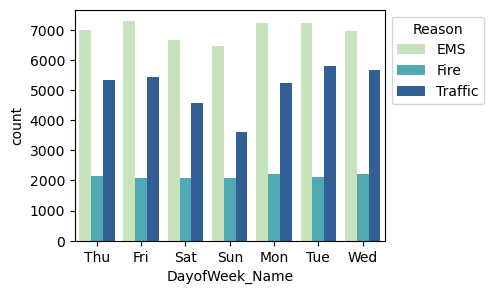

In [26]:
plt.figure(figsize =  (4,3))
cnt = sns.countplot(data = df, x = 'DayofWeek_Name', hue = 'Reason', palette = "YlGnBu" )
sns.move_legend(cnt, "upper left", bbox_to_anchor=(1, 1))

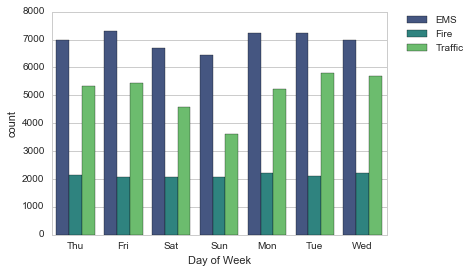

**Now do the same for Month:**

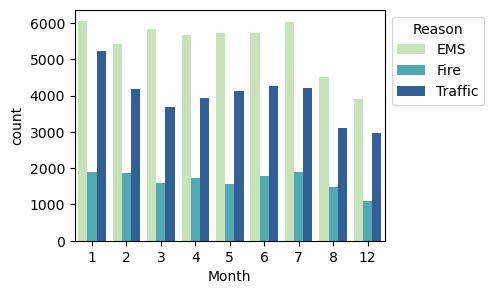

In [28]:
plt.figure(figsize =  (4,3))
cnt = sns.countplot(data = df, x = 'Month', hue = 'Reason', palette = "YlGnBu" )
sns.move_legend(cnt, "upper left", bbox_to_anchor=(1, 1))

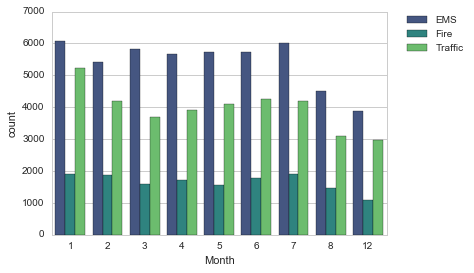

** noticed it was missing some Months**

_____

In [52]:
df1 = df[['Month','e']].groupby('Month').sum()
df2 = pd.DataFrame(data = [0,0,0],index = [9,10,11], columns= ['e'])

df3 = pd.concat([df1, df2]).sort_index()
df3
# .groupby('Month').sum()

,e
1,13205
2,11467
3,11101
4,11326
5,11423
6,11786
7,12137
8,9078
9,0
10,0


** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

/var/folders/l3/f7hpz30s08nbzkwqz28bhvnr0000gn/T/ipykernel_64270/3820804996.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df3, x = df3.index, y = 'e', palette = "coolwarm" )


<Axes: xlabel='None', ylabel='e'>

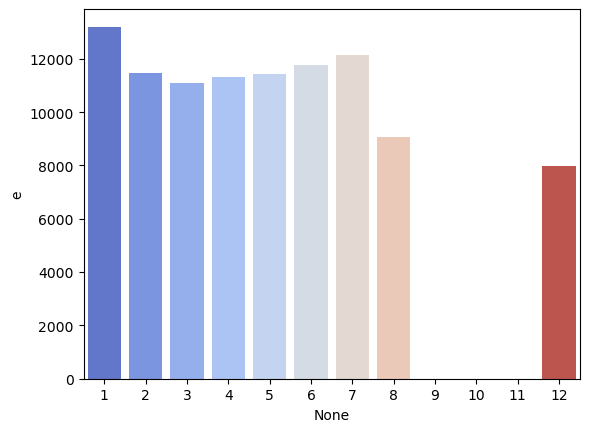

In [36]:
sns.barplot(data = df3, x = df3.index, y = 'e', palette = "coolwarm" )
# sns.move_legend(cnt, "upper left", bbox_to_anchor=(1, 1))

** Create a linear fit on the number of calls per month **

In [54]:
df3.reset_index(inplace = True)


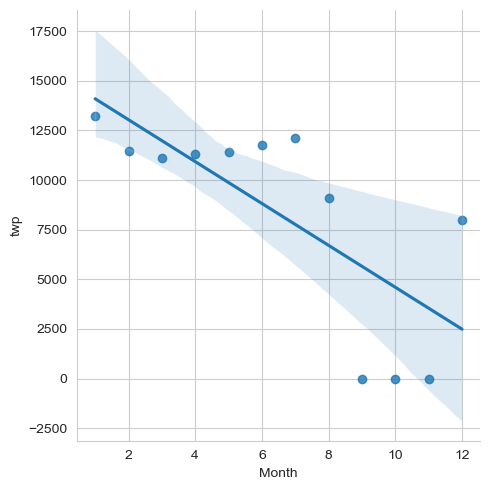

In [70]:
sns.set_style(style = "whitegrid")
gh = sns.lmplot(data = df3, x = 'index', y= 'e')
gh.set_xlabels("Month")
gh.set_ylabels("twp")

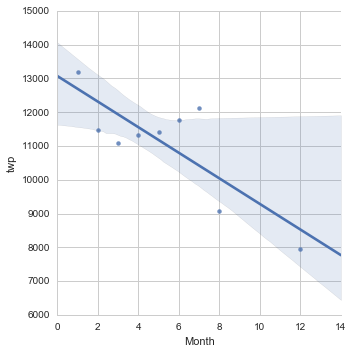

**Create a new column called 'Date' that contains the date from the timeStamp column. **

In [82]:
# df['date'] = pd.to_datetime(df['timeStamp'].apply(, format = "%Y-%m-%d")
import datetime

In [104]:
df['date'] = df['timeStamp1'].dt.date
# datetime.datetime.strptime(, format = "%Y-%m-%d")
# date(df['timeStamp1'][0])

<Axes: xlabel='date', ylabel='e'>

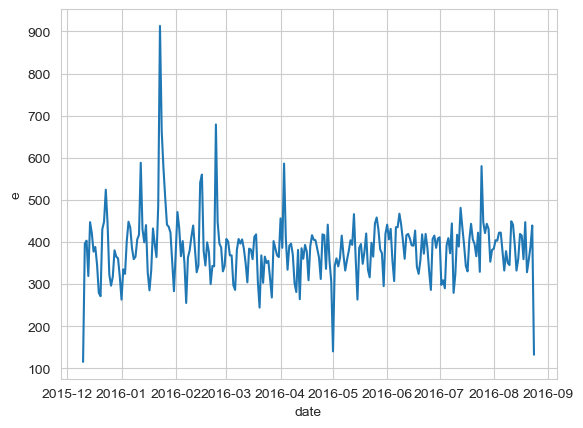

In [112]:
df4 = df[['date','e']].groupby('date').sum()
sns.lineplot(df4, y ='e', x = df4.index)

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

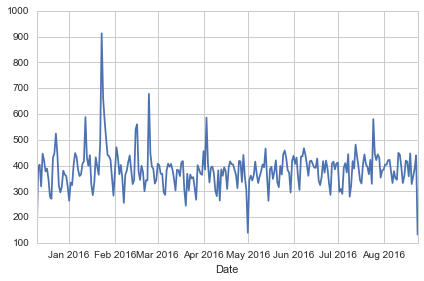

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [191]:
df4 = df[['date','e','Reason']].groupby(['date','Reason']).sum()
df4.head()

df4.reset_index(inplace = True)
df4.head()

df4['date1'] = df4['date'].apply( lambda x: datetime.datetime.strftime(x , "%b %Y"))
df4
# sns.lineplot(df4, y ='e', x = df4.index)

,date,Reason,e,date1
0,2015-12-10,EMS,57,Dec 2015
1,2015-12-10,Fire,15,Dec 2015
2,2015-12-10,Traffic,43,Dec 2015
3,2015-12-11,EMS,186,Dec 2015
4,2015-12-11,Fire,69,Dec 2015
...,...,...,...,...
772,2016-08-23,Fire,70,Aug 2016
773,2016-08-23,Traffic,151,Aug 2016
774,2016-08-24,EMS,71,Aug 2016
775,2016-08-24,Fire,19,Aug 2016


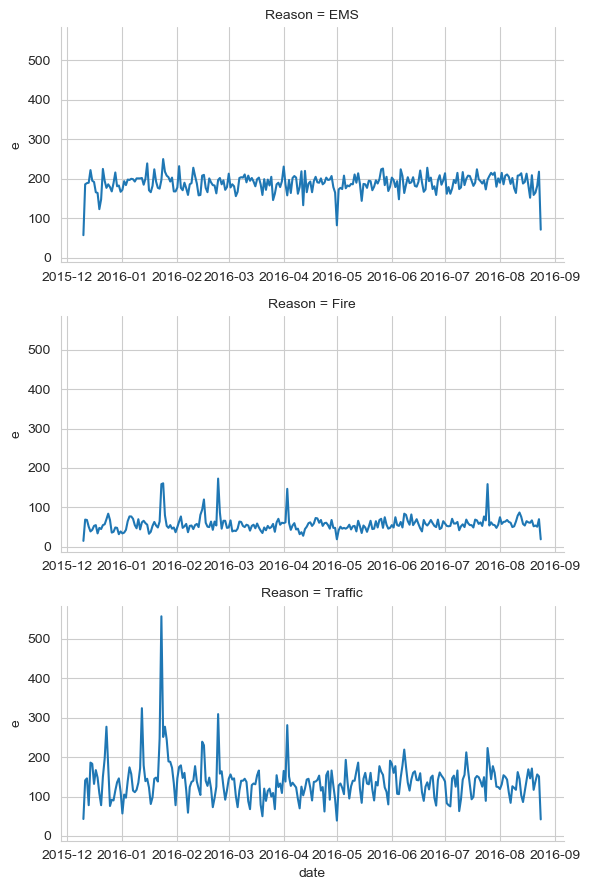

In [195]:
gh = sns.FacetGrid(df4, row = 'Reason',aspect= 2, sharex= False)

gh.tight_layout()
gh.map(sns.lineplot,'date','e')

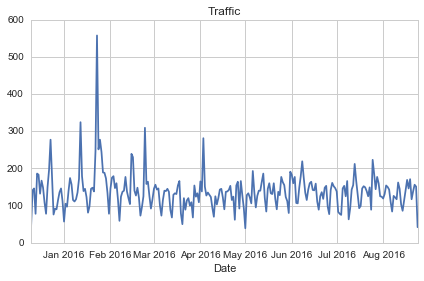

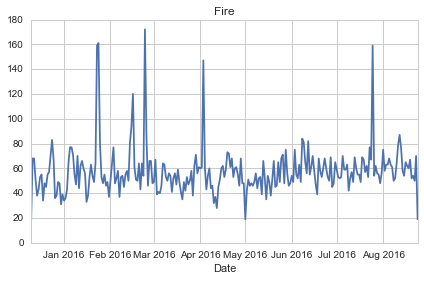

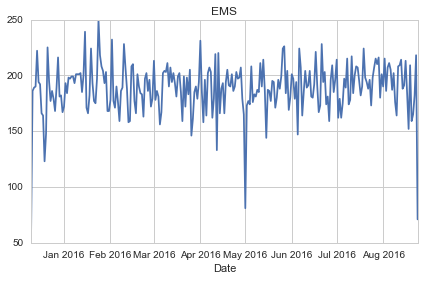

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [218]:
df.head()

df6 = df[['Hours','DayofWeek_Name','e']].groupby(['Hours','DayofWeek_Name']).sum().reset_index()

df6.head()

df7 = df6.pivot_table(values = 'e', index = 'DayofWeek_Name', columns= 'Hours')
df7.head()

Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek_Name,,,,,,,,,,,,,,,,,,,,,
Fri,275.0,235.0,191.0,175.0,201.0,194.0,372.0,598.0,742.0,752.0,...,932.0,980.0,1039.0,980.0,820.0,696.0,667.0,559.0,514.0,474.0
Mon,282.0,221.0,201.0,194.0,204.0,267.0,397.0,653.0,819.0,786.0,...,869.0,913.0,989.0,997.0,885.0,746.0,613.0,497.0,472.0,325.0
Sat,375.0,301.0,263.0,260.0,224.0,231.0,257.0,391.0,459.0,640.0,...,789.0,796.0,848.0,757.0,778.0,696.0,628.0,572.0,506.0,467.0
Sun,383.0,306.0,286.0,268.0,242.0,240.0,300.0,402.0,483.0,620.0,...,684.0,691.0,663.0,714.0,670.0,655.0,537.0,461.0,415.0,330.0
Thu,278.0,202.0,233.0,159.0,182.0,203.0,362.0,570.0,777.0,828.0,...,876.0,969.0,935.0,1013.0,810.0,698.0,617.0,553.0,424.0,354.0


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hours', ylabel='DayofWeek_Name'>

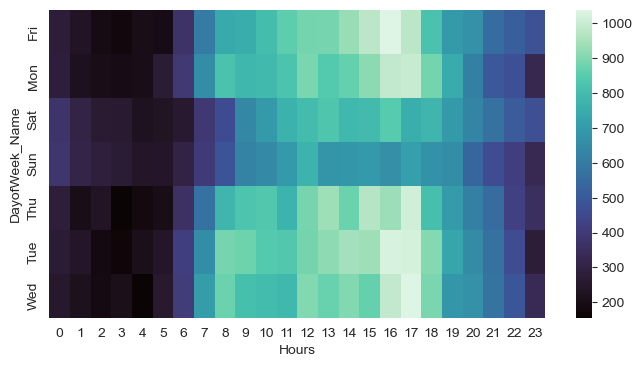

In [227]:
plt.figure(figsize= (8,4))
sns.heatmap(df7, cmap = "mako")

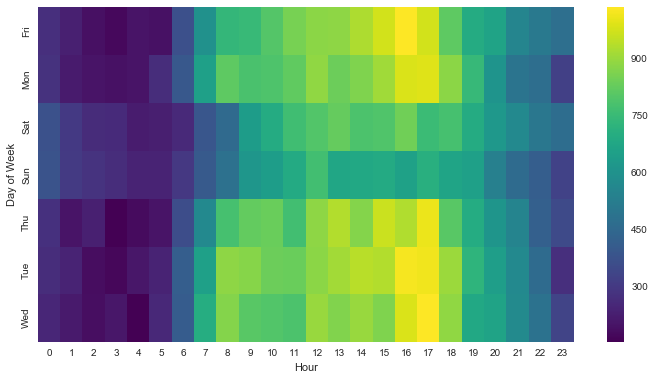

** Now create a clustermap using this DataFrame. **

<Figure size 640x480 with 0 Axes>

<Figure size 300x400 with 0 Axes>

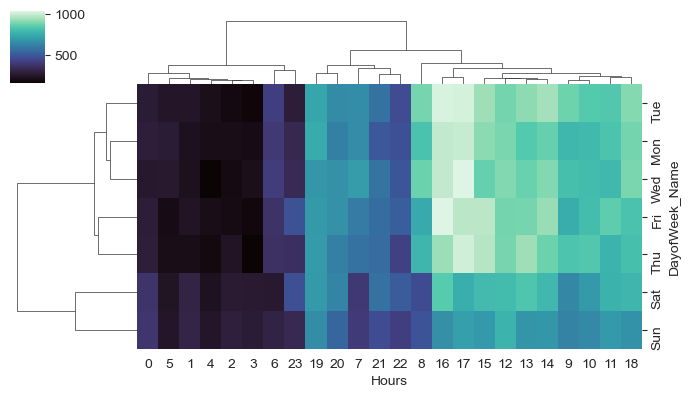

In [242]:

plt.clf()
plt.figure(figsize= (3,4))
sns.clustermap(df7, cmap = "mako", figsize= (7,4))

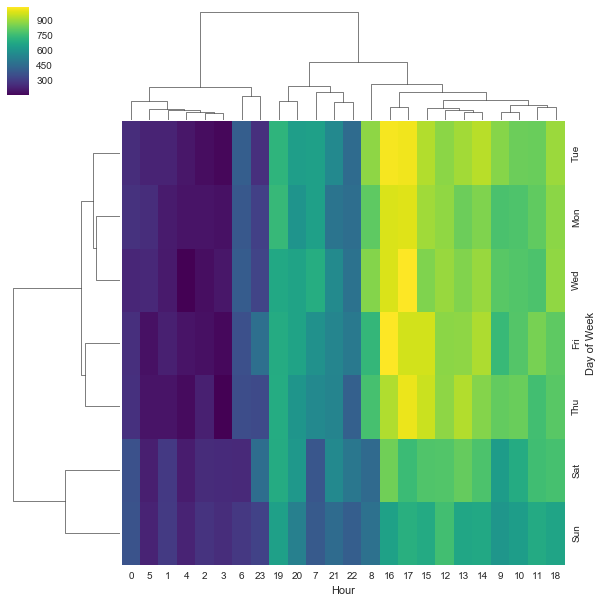

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [249]:
df.head()

df8 = df[['DayofWeek_Name','Month','e']].groupby(['DayofWeek_Name','Month']).sum().reset_index()

df8.head()

df9 = df6.pivot_table(values = 'e', index = 'DayofWeek_Name', columns= 'Month')
df9.head()

,DayofWeek_Name,Month,e
0,Fri,1,1970
1,Fri,2,1581
2,Fri,3,1525
3,Fri,4,1958
4,Fri,5,1730


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


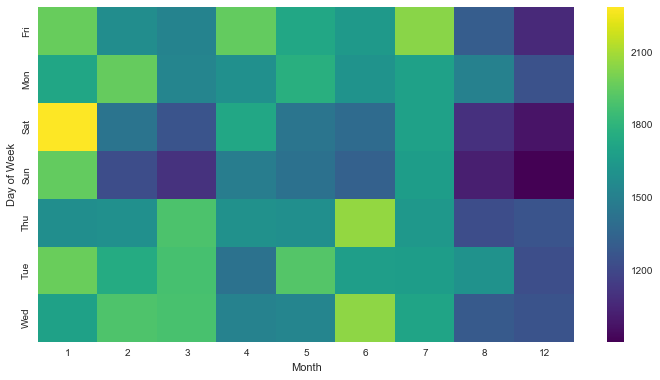

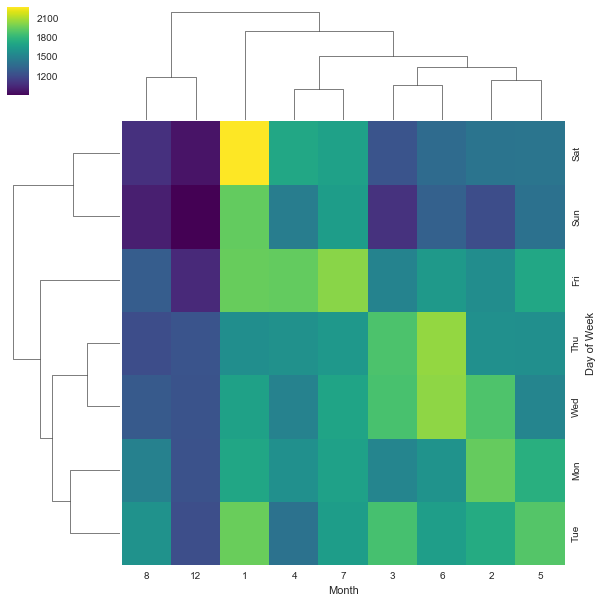

**Continue exploring the Data however you see fit!**
# Great Job!